### Import Necessary Library 

In [1]:
import keras
from keras.models import Sequential
from keras import preprocessing
from keras.layers import Flatten, Dense, Embedding
from keras.utils import pad_sequences

### Loading The Inbuild Data

In [2]:
from keras.datasets import imdb  # Dataset contain a different types of movies review

max_features = 10000
maxlen = 20


# Create a training and testing data
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=10000)
# (train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

X_train = keras.utils.pad_sequences(X_train,maxlen=maxlen)
X_test  = keras.utils.pad_sequences(X_test,maxlen=maxlen)


# Create a Architecture 
model = Sequential()

model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [3]:
# Getting the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [4]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### Training Model

In [5]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1 )

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6763 - accuracy: 0.5937 - val_loss: 0.6362 - val_accuracy: 0.6814
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5612 - accuracy: 0.7388 - val_loss: 0.5374 - val_accuracy: 0.7258
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4717 - accuracy: 0.7814 - val_loss: 0.5059 - val_accuracy: 0.7446
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4256 - accuracy: 0.8072 - val_loss: 0.4950 - val_accuracy: 0.7518
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3944 - accuracy: 0.8245 - val_loss: 0.4932 - val_accuracy: 0.7566
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3696 - accuracy: 0.8382 - val_loss: 0.4971 - val_accuracy: 0.7572
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8518 - val_loss: 0.5048 - val_accuracy: 0.7584
Epoch 

In [10]:
# Geting the weights
model.weights

[<tf.Variable 'embedding/embeddings:0' shape=(10000, 8) dtype=float32, numpy=
 array([[-0.0616175 ,  0.09793058,  0.03534253, ..., -0.00738075,
         -0.08110262,  0.05447012],
        [ 0.00805973,  0.02537897,  0.02778775, ...,  0.00663361,
         -0.02663593,  0.00696786],
        [ 0.0321675 ,  0.05065076,  0.00572325, ..., -0.00915996,
         -0.00864303,  0.08322858],
        ...,
        [-0.08994734, -0.11079894,  0.02758189, ..., -0.04769049,
         -0.10283931, -0.01479265],
        [ 0.0160183 ,  0.10170104,  0.07157064, ..., -0.02265514,
         -0.06744894,  0.07765069],
        [ 0.00948982, -0.08033878,  0.01540775, ...,  0.04831139,
          0.07994629, -0.03577187]], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(160, 1) dtype=float32, numpy=
 array([[-0.2521877 ],
        [ 0.00888523],
        [-1.1230137 ],
        [-0.9647394 ],
        [-1.1172715 ],
        [-0.9829704 ],
        [ 1.1621641 ],
        [-0.22131626],
        [ 0.85170615],
    

In [7]:
# Prediction on test data
model.predict(X_test)

782/782 [==============================] - 1s 758us/step


array([[0.31886822],
       [0.717078  ],
       [0.11740071],
       ...,
       [0.14986597],
       [0.16367565],
       [0.6968982 ]], dtype=float32)

### Model Evaluation

In [8]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 1s 805us/step - loss: 0.5213 - accuracy: 0.7547


[0.521263062953949, 0.7547199726104736]

### Plotting [Accuracy & Validation accuracy] & [loss and validation loss] 

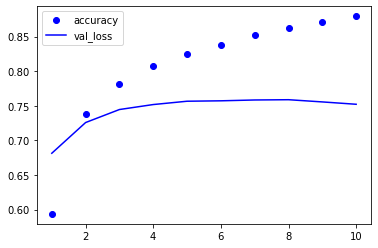

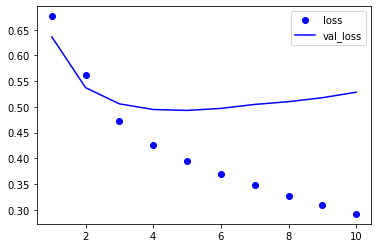

In [9]:
import matplotlib.pyplot as plt

accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,'bo',label='accuracy')
plt.plot(epochs,val_accuracy,'b',label='val_loss')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='loss')
plt.plot(epochs,val_loss,'b',label='val_loss')
plt.legend()
plt.show()